# RNN Text: Tweet Classification


# Shareable Links to the data

* CNN:
https://drive.google.com/drive/u/1/folders/1IF1s7H9gw3-IZhosgyPQgt727VuiN21t

* Fox News:
https://drive.google.com/drive/u/1/folders/1IGlvW_HQz87_r8bWg0hb74f1zXT7mOlZ


# Part I: Data Preparation

* The two organizations that I am choosing for RNN Tweet Classification are CNN and Fox News. The two are America's biggest news sources and have completely different views on news like COVID-19 or US Elections 2020. They have been competitors when it comes to ratings and daily viewership.
* CNN - Cable News Network is a multinational news based pay television channel headquartered in Atlanta with an annual revenue of US$1.2 billion in 2020.

* Fox News is an American multinational conservative cable news television channel based in New York City with an annual revenue of US$12.3 billion in 2020.
* I closely followed US 2020 Elections and it was fascinating to see two biggest news channels of America to have completely opposite views on the elections.
* I am interested in analyzing the tweets by these organizations to have a more deeper insight about their style of reporting. I have also observed that the same news was presented to the audience by CNN and Fox News in two completely different ways. 
* I think Professor would find the RNN Tweet Classification of these two News Network Moguls of American Cable Network interesting to see how they differ in opinions on the same subjects.


## Mounting the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing snscrape to scrape the tweets and save them as csv files

In [ ]:
#importing snscrape to scrape the tweets and save them as csv files
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import csv

## Creating CNN and Fox folders on Drive

In [ ]:
# make a folder to store data
base_dir = '/content/drive/MyDrive/OPIM 5509- Deep Learning/Module 5/Assignment 5.2/Data'

import tensorflow as tf

#Create a new directory- cnn_dir in your Drive
tf.io.gfile.mkdir(base_dir)

#Combine the 2 strings
cnn_dir = base_dir + '/CNN/'

#Create the second directory
tf.io.gfile.mkdir(cnn_dir)



In [ ]:
#Create a new directory- fox_dir in your Drive
tf.io.gfile.mkdir(base_dir)

#Combine the 2 strings
fox_dir = base_dir + '/Fox/'

#Create the second directory
tf.io.gfile.mkdir(fox_dir)

## Scraping 2000 tweets from CNN 

In [ ]:
# scraping 2000 tweets from CNN
maxTweets = 2000

# username and number of twitter handle of CNN
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@CNN + since:2018-04-07 until:2021-04-07-filter:links -filter:replies').get_items()):
  csvFile = open(cnn_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])

  if i > maxTweets :
    break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
csvFile.close()

## Scraping 2000 tweets from Fox News

In [ ]:
# scraping 2000 tweets from Fox News
maxTweets = 2000

# username and number of twitter handle of Fox News
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@FoxNews + since:2018-04-07 until:2021-04-07-filter:links -filter:replies').get_items()):
  csvFile = open(fox_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])

  if i > maxTweets :
    break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
csvFile.close()

## Loading data from the drive and preparing the data for modeling

In [ ]:
import os

# no slash needed at end!
# small data
twitter_dir = '/content/drive/MyDrive/OPIM 5509- Deep Learning/Module 5/Assignment 5.2/Data'

labels = []
texts = []
count = 0


# time it
from time import time
startTime = time()

for label_type in ['CNN/', 'Fox/']:
    dir_name = os.path.join(twitter_dir, label_type)
    for fname in os.listdir(dir_name):
      if fname[-4:] == '.csv':
          
          count = count + 1
          print(count)

          f = open(os.path.join(dir_name, fname))
          texts.append(f.read())
          f.close()
          if label_type == 'CNN/':
              labels.append(0)
          else:
              labels.append(1)
              
      if count > 3999: 
          count = 0
          break
print('DONE!')
print(time() - startTime)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
# Tokenize, pad and prepare training and validation data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
validation_samples = 1000  # We will be validating on 1000 samples
max_words = 1000  # We will only consider the top 1000 words in the dataset

In [ ]:
tokenizer = Tokenizer(num_words=max_words)

# fit_on_texts means it learns the indices of the words
tokenizer.fit_on_texts(texts)
# the sequences are comprised of those indices
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# in case of low word counts, we need to pad sequences
# so that they are uniform length
data = pad_sequences(sequences, maxlen=maxlen)
# our labels, which were previously stored as a list [],
# are now converted to a numpy array for modeling
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 19908 unique tokens.
Shape of data tensor: (4000, 100)
Shape of label tensor: (4000,)


In [ ]:
#printing the first entry in texts
print(texts[0])

id,date,tweet
1374847291803234304,2021-03-24 22:15:12+00:00,"Former President Trump started a controversial trade war with China three years ago, putting tariffs on roughly $350 billion of Chinese-made goods -- and despite the change in administration, those duties remain in place. https://t.co/ZkAEv8dmJM"



In [ ]:
#printing first entry in sequences
print(sequences[0])

[7, 8, 5, 6, 10, 69, 39, 21, 28, 1, 1, 111, 78, 65, 636, 13, 782, 872, 384, 34, 319, 303, 134, 411, 19, 436, 12, 460, 266, 16, 336, 9, 554, 14, 150, 304, 14, 513, 3, 4, 2]


In [ ]:
#printing first entry in data
print(data[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   7   8   5   6  10  69  39  21  28   1   1 111  78
  65 636  13 782 872 384  34 319 303 134 411  19 436  12 460 266  16 336
   9 554  14 150 304  14 513   3   4   2]


## Splitting the data into training and calidation dataset
* Training samples: 3000
* Validation samples: 1000

In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

training_samples = 3000  # We will be training on 3000 samples

x_train = data[:training_samples] # from 0 to training samples
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [ ]:
#printing training and validation shapes
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(3000, 100) (3000,)
(1000, 100) (1000,)


# Part II: Modeling

## Model 1: LSTM and GRU Layers
The architecture has LSTM and GRU layers going into a dense layer

* LSTM Layer with 128 hidden units
  * Recurrent dropout with 0.2 probability
  * Return sequences: True 
* GRU Layer with 64 hidden units
  * Recurrent dropout with 0.2 probability
* Dense Layer with 32 hidden units
  * Activation function: relu
* Compile the model with
  * Optimizer: Adam
  * Loss: Binary Crossentropy
* Fit the model with 
  * Epochs: 10
  * Batch size: 10
* The model has 117,505 trainable parameters

In [ ]:
#importing modules required to create RNN models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, GRU, Bidirectional, SimpleRNN, Conv1D, MaxPool1D
#define the model
model = Sequential()
#embedding layer with max_words = 1000, input_length = 100
model.add(Embedding(max_words, 8, input_length=maxlen))
#LSTM layer with 128 hidden units and recurrent dropout of 0.2 probability
model.add(LSTM(128, recurrent_dropout=0.2, return_sequences = True))
#GRU layer with 64 hidden units and recurrent dropout of 0.2 probability
model.add(GRU(64, recurrent_dropout=0.2))
#Dense layer with 32 hidden units
model.add(Dense(32, activation='relu'))
#output layer with 'sigmoid' activation function
model.add(Dense(1, activation='sigmoid'))
#print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 8)            8000      
_________________________________________________________________
lstm (LSTM)                  (None, 100, 128)          70144     
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 117,505
Trainable params: 117,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
#create a variable "history" to store accuracy and loss for training and validation
#fit the model on x_train and y_train with 10 epochs and 10 bach_size, and the validation data of x_val and y_val
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
300/300 [==============================] - 79s 251ms/step - loss: 0.3666 - acc: 0.8225 - val_loss: 0.0774 - val_acc: 0.9770
Epoch 2/10
300/300 [==============================] - 74s 246ms/step - loss: 0.0605 - acc: 0.9806 - val_loss: 0.1030 - val_acc: 0.9670
Epoch 3/10
300/300 [==============================] - 73s 244ms/step - loss: 0.0414 - acc: 0.9861 - val_loss: 0.0660 - val_acc: 0.9800
Epoch 4/10
300/300 [==============================] - 74s 245ms/step - loss: 0.0231 - acc: 0.9935 - val_loss: 0.0841 - val_acc: 0.9800
Epoch 5/10
300/300 [==============================] - 74s 247ms/step - loss: 0.0176 - acc: 0.9948 - val_loss: 0.0744 - val_acc: 0.9780
Epoch 6/10
300/300 [==============================] - 74s 247ms/step - loss: 0.0104 - acc: 0.9965 - val_loss: 0.0948 - val_acc: 0.9710
Epoch 7/10
300/300 [==============================] - 74s 247ms/step - loss: 0.0132 - acc: 0.9943 - val_loss: 0.1162 - val_acc: 0.9750
Epoch 8/10
300/300 [==============================] - 7

#### Evaluating the Model 
* Lets look at the learning curves for Training and Validation Loss and Training and Validation Accuracy.
* Lets also look at the confusion matrix and the classification report

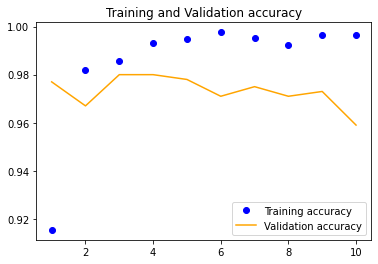

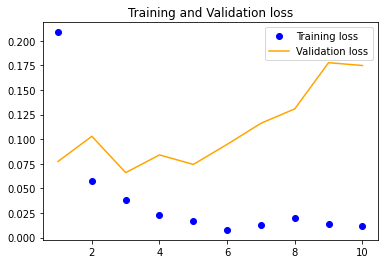

In [ ]:
#importing matplotlib to plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
#plotting training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
#plotting training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
# modules to evaluate the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# this is the highest validation accuracy
print('The highest validation accuracy for Model 1:', np.max(val_acc))

The highest validation accuracy for Model 1: 0.9800000190734863


In [ ]:
# the numbers are between 0 and 1
model.predict(x_val)

array([[4.31273802e-05],
       [9.97966766e-01],
       [9.99792576e-01],
       [1.45999491e-02],
       [9.99983072e-01],
       [4.18275595e-04],
       [9.99993503e-01],
       [7.99068809e-03],
       [1.30146742e-04],
       [4.15021022e-05],
       [1.01195743e-04],
       [1.01824116e-04],
       [2.26676464e-04],
       [9.99955118e-01],
       [3.50814116e-05],
       [1.12646818e-03],
       [1.40387416e-02],
       [1.78177888e-05],
       [5.05539065e-05],
       [9.99961197e-01],
       [9.99971330e-01],
       [2.40623951e-04],
       [9.99990582e-01],
       [1.20920282e-04],
       [4.06297295e-05],
       [9.99915600e-01],
       [9.99993265e-01],
       [9.99729514e-01],
       [9.99992132e-01],
       [9.99437273e-01],
       [1.82896852e-04],
       [9.76088464e-01],
       [5.81199825e-01],
       [9.99965131e-01],
       [3.31124138e-05],
       [4.47164057e-05],
       [1.34244561e-03],
       [1.38878822e-04],
       [1.43975019e-04],
       [1.14136827e-04],


In [ ]:
#rounding off the values of x_val
np.round(model.predict(x_val),0)

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [ ]:
# here is y_val
y_val

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
preds = np.round(model.predict(x_val),0)

# confusion matrix
confusion_matrix(y_val, preds) # (actual, predicted)

# top left is TN
# bottom left is FN
# top right is FP
# bottom right is TP

array([[504,   3],
       [ 38, 455]])

In [ ]:
#classification report to show the main classification metrics: precision, recall and f1-score on a per-class basis. 
#The metrics are calculated by using true and false positives, true and false negatives.

print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       507
           1       0.99      0.92      0.96       493

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



## Model 2: Bidirectional RNN Layers

The architecture has LSTM and GRU layers going into a dense layer

* Bidirectional LSTM Layer with 200 hidden units
  * Recurrent dropout with 0.2 probability
  * Return sequences: True
  * Activation function: relu 
* Bidirectional SimpleRNN Layer with 100 hidden units
  * Recurrent dropout with 0.2 probability
  * Return sequences: True 
  * Activation function: relu
* GRU Layer with 50 hidden units
  * Recurrent dropout with 0.2 probability
  * Activation function: relu
* Dropout Layer with 0.5 probability
* Dense Layer 1 with 40 hidden units
  * Activation function: relu
* Dense Layer 2 with 30 hidden units
  * Activation function: relu
* Dense Layer 3 with 20 hidden units
  * Activation function: relu
* Dense Layer 4 with 10 hidden units
  * Activation function: relu
* Compile the model with
  * Optimizer: Adam
  * Loss: Binary Crossentropy
* Fit the model with 
  * Epochs: 10
  * Batch size: 50
* The model has 484,511 trainable parameters

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Dropout
#define the model
model = Sequential()
#Embedding layer
model.add(Embedding(max_words, 8, input_length=maxlen))
#Bidirectional LSTM Layer with 200 hidden units and recurrent dropout of 0.2 probability
model.add(Bidirectional(LSTM(200, recurrent_dropout=0.2, return_sequences = True, activation='relu')))
#Bidirectional SimpleRNN Layer with 100 hidden units and recurrent dropout of 0.2 probability
model.add(Bidirectional(SimpleRNN(100, recurrent_dropout=0.2, return_sequences = True, activation='relu')))
#GRU Layer with 50 hidden units and recurrent dropout of 0.2 probability
model.add(GRU(50, recurrent_dropout=0.2, activation='relu'))
#Dropout Layer with 0.5 probability
model.add(Dropout(0.5))
#Dense Layer 1 with 40 hidden units
model.add(Dense(40, activation='relu'))
#Dense Layer 2 with 30 hidden units
model.add(Dense(30, activation='relu'))
#Dense Layer 3 with 20 hidden units
model.add(Dense(20, activation='relu'))
#Dense Layer 4 with 10 hidden units
model.add(Dense(10, activation='relu'))
#Output Layer with sigmoid activation function
model.add(Dense(1, activation='sigmoid'))
#printing the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 8)            8000      
_________________________________________________________________
bidirectional_6 (Bidirection (None, 100, 400)          334400    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 100, 200)          100200    
_________________________________________________________________
gru_5 (GRU)                  (None, 50)                37800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_20 (Dense)             (None, 30)               

In [ ]:
#compile the model wit adam optimizer
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
#fit and run the model with 10 epochs and 50 batch size
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Epoch 1/10
60/60 [==============================] - 88s 1s/step - loss: 0.6905 - acc: 0.5435 - val_loss: 0.6852 - val_acc: 0.5080
Epoch 2/10
60/60 [==============================] - 82s 1s/step - loss: 1.2994 - acc: 0.6086 - val_loss: 1169624.6250 - val_acc: 0.5540
Epoch 3/10
60/60 [==============================] - 81s 1s/step - loss: 7477004.2526 - acc: 0.8054 - val_loss: 0.4281 - val_acc: 0.9510
Epoch 4/10
60/60 [==============================] - 82s 1s/step - loss: 2.1074 - acc: 0.9449 - val_loss: 0.3312 - val_acc: 0.9550
Epoch 5/10
60/60 [==============================] - 82s 1s/step - loss: 0.4390 - acc: 0.9555 - val_loss: 0.3342 - val_acc: 0.9450
Epoch 6/10
60/60 [==============================] - 81s 1s/step - loss: 0.3562 - acc: 0.9482 - val_loss: 0.2834 - val_acc: 0.9460
Epoch 7/10
60/60 [==============================] - 82s 1s/step - loss: 143.1694 - acc: 0.9475 - val_loss: 0.2878 - val_acc: 0.9380
Epoch 8/10
60/60 [==============================] - 81s 1s/step - loss: 0.28

#### Evaluating the Model 
* Lets look at the learning curves for Training and Validation Loss and Training and Validation Accuracy.
* Lets also look at the confusion matrix and the classification report

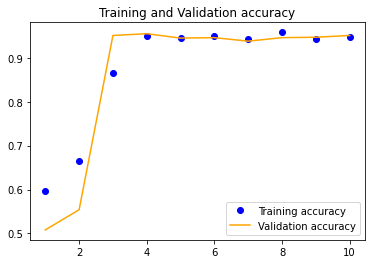

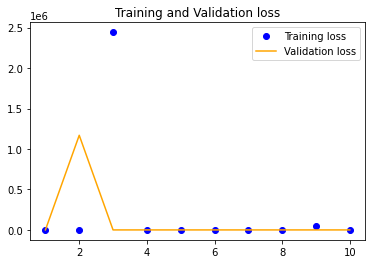

In [ ]:
#importing matplotlib to plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
#plotting training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
#plotting training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
# this is the highest validation accuracy
print('The highest validation accuracy for Model 2:', np.max(val_acc))

The highest validation accuracy for Model 2: 0.9549999833106995


In [ ]:
# the numbers are between 0 and 1
model.predict(x_val)

array([[0.8425434 ],
       [0.1104947 ],
       [0.12562305],
       [0.841467  ],
       [0.09518576],
       [0.10815111],
       [0.84854484],
       [0.84506774],
       [0.83247614],
       [0.11133897],
       [0.8435514 ],
       [0.82081115],
       [0.8255636 ],
       [0.11920944],
       [0.840329  ],
       [0.83905923],
       [0.11111313],
       [0.8431705 ],
       [0.8491883 ],
       [0.83230674],
       [0.11173236],
       [0.8355335 ],
       [0.12128246],
       [0.10110769],
       [0.8249059 ],
       [0.13024801],
       [0.83572423],
       [0.8077346 ],
       [0.13488352],
       [0.12216607],
       [0.7304589 ],
       [0.8337017 ],
       [0.8505181 ],
       [0.79007125],
       [0.10953885],
       [0.14816421],
       [0.12203223],
       [0.10353562],
       [0.10042611],
       [0.38019022],
       [0.79117763],
       [0.38126826],
       [0.09819457],
       [0.82999384],
       [0.83671165],
       [0.73040974],
       [0.10415214],
       [0.103

In [ ]:
#rounding off the values of x_val
np.round(model.predict(x_val),0)

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],

In [ ]:
# here is y_val
y_val

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

In [ ]:
preds = np.round(model.predict(x_val),0)

# confusion matrix
confusion_matrix(y_val, preds) # (actual, predicted)

# top left is TN
# bottom left is FN
# top right is FP
# bottom right is TP

array([[477,  30],
       [ 19, 474]])

In [ ]:
#classification report to show the main classification metrics: precision, recall and f1-score on a per-class basis. 
#The metrics are calculated by using true and false positives, true and false negatives.

print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       507
           1       0.94      0.96      0.95       493

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



## Model 3: Stacked Layers
With Glove words Embeddings

### Pre-processing the embeddings

Let's parse the un-zipped file to build an index mapping words (as strings) to their vector representation (as number 
vectors).

In [ ]:
#import modules required for preprocessing
import numpy as np
import os

# creating a glove directory to store the embedding words, there is a slash at the end!
glove_dir = '//content/drive/MyDrive/OPIM 5509- Deep Learning/Module 5/Assignment 5.2/Data/GloVe/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
#printing the word vectors
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.



Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words, 
embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index 
(built during tokenization). The index `0` is not supposed to stand for any word or token, it's a placeholder.

In [ ]:
embedding_dim = 100 # this is the dimension of the file we imported

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

### Define a Model

* Convolution Layer Conv1D with 500 hidden units
  * Kernel size: 2
* Maxpooling Layer Maxpool1D 
  * Pool size: 2
* Bidirectional LSTM Layer with 250 hidden units
  * Recurrent dropout with 0.2 probability
  * Return sequences: True 
* GRU Layer with 175 hidden units
  * Recurrent dropout with 0.2 probability
  * Return sequences: True 
* SimpleRNN Layer with 100 hidden units
* Dropout Layer with 0.5 probability
* Dense Layer with 50 hidden units
  * Activation function: relu
* Compile the model with
  * Optimizer: Adam
  * Loss: Binary Crossentropy
* Fit the model with 
  * Epochs: 10
  * Batch size: 32
* I will also use EarlyStopping callbacks to prevent overfitting with a patience of 10
* The model has 2,090,626 trainable parameters

In [ ]:
#modules required for RNN models
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, Bidirectional, Conv1D, MaxPool1D, Embedding, Flatten
#define a model
model = Sequential()
#Embedding layer
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
#Conv1D layer with 500 hidden units and kernel size = 2
model.add(Conv1D(500,kernel_size=2))
#Maxpooling 1D layer with pool size = 2
model.add(MaxPool1D(2))
#Bidirectional LSTM layer with 250 hidden units and recurrent dropout of 0.2 probability
model.add(Bidirectional(LSTM(250, recurrent_dropout=0.2, return_sequences = True, activation='relu')))
#GRU layer with 175 hidden units and recurrent dropout of 0.2 probability
model.add(GRU(175, recurrent_dropout=0.2, return_sequences = True, activation='relu'))
#SimpleRNN layer with 100 hidden units
model.add(SimpleRNN(100, activation='relu'))
#Dropout layer with 0.5 probability
model.add(Dropout(0.5))
#Dense layer with 50 hidden units
model.add(Dense(50, activation='relu'))
#Output layer with sigmoid activation function
model.add(Dense(1, activation='sigmoid'))
#printing model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          100000    
_________________________________________________________________
conv1d (Conv1D)              (None, 99, 500)           100500    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 49, 500)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 49, 500)           1502000   
_________________________________________________________________
gru_3 (GRU)                  (None, 49, 175)           355425    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100)               27600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)              

### Load the GloVe embeddings in the model


The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with 
index `i`. Simple enough. Let's load the GloVe matrix we prepared into our `Embedding` layer, the first layer in our model:


Additionally, we freeze the embedding layer by setting its `trainable` attribute to `False`. when parts of a model are pre-trained like our `Embedding` layer and parts are randomly initialized (like our classifier), the pre-trained parts should not be updated during training to avoid forgetting what they already know. 

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False # freezes everything

### Train and evaluate

Let's compile our model and train it:

In [ ]:
#module for EarlyStopping
from keras.callbacks import EarlyStopping
#Compiling the model with adam optimizer
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
# early stopping callback
# We will use EarlyStopping callbacks to prevent overfitting with a patience of 10
es = EarlyStopping(monitor='val_acc', 
                   mode='max',
                   patience=10,
                   restore_best_weights=True)
#Fit and run the model with 50 epochs, 100 batchsize and EarlyStopping
history = model.fit(x_train, y_train,
                    callbacks=[es],
                    epochs=50,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 99s 3s/step - loss: 0.4119 - acc: 0.7827 - val_loss: 0.1405 - val_acc: 0.9640
Epoch 2/50
30/30 [==============================] - 94s 3s/step - loss: 0.1403 - acc: 0.9492 - val_loss: 0.1194 - val_acc: 0.9640
Epoch 3/50
30/30 [==============================] - 93s 3s/step - loss: 0.0852 - acc: 0.9703 - val_loss: 0.1016 - val_acc: 0.9720
Epoch 4/50
30/30 [==============================] - 90s 3s/step - loss: 0.0912 - acc: 0.9644 - val_loss: 0.1063 - val_acc: 0.9660
Epoch 5/50
30/30 [==============================] - 90s 3s/step - loss: 0.0651 - acc: 0.9765 - val_loss: 0.1130 - val_acc: 0.9730
Epoch 6/50
30/30 [==============================] - 91s 3s/step - loss: 0.0581 - acc: 0.9825 - val_loss: 0.1730 - val_acc: 0.9570
Epoch 7/50
30/30 [==============================] - 89s 3s/step - loss: 0.0515 - acc: 0.9805 - val_loss: 0.0963 - val_acc: 0.9750
Epoch 8/50
30/30 [==============================] - 89s 3s/step - loss: 0.0225 - acc: 0.99

#### Evaluating the Model 
* Lets look at the learning curves for Training and Validation Loss and Training and Validation Accuracy.
* Lets also look at the confusion matrix and the classification report

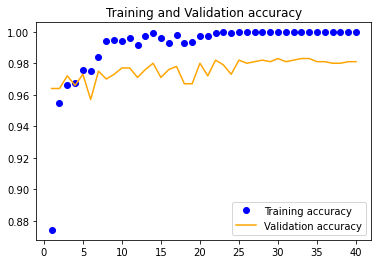

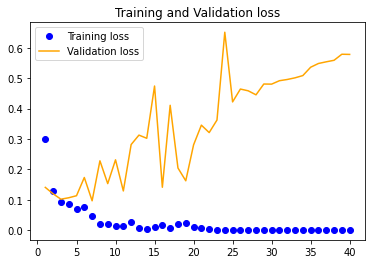

In [ ]:
#importing matplotlib to plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
#plotting training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
#plotting training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
# this is the highest validation accuracy
print('The highest validation accuracy for Model 3:', np.max(val_acc))

The highest validation accuracy for Model 3: 0.9829999804496765


In [ ]:
# the numbers are between 0 and 1
model.predict(x_val)

array([[0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [5.71891129e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [7.47257207e-28],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.02962153e-28],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.92438110e-18],
       [1.00000000e+00],
       [1.00000000e+00],
       [5.51980995e-23],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [2.38967772e-23],
       [7.72241265e-07],
       [3.52442298e-10],
       [6.48778227e-19],
       [0.00000000e+00],


In [ ]:
#rounding off the values of x_val
np.round(model.predict(x_val),0)

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [ ]:
# here is y_val
y_val

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
preds = np.round(model.predict(x_val),0)

# confusion matrix
confusion_matrix(y_val, preds) # (actual, predicted)

# top left is TN
# bottom left is FN
# top right is FP
# bottom right is TP

array([[500,   7],
       [ 10, 483]])

In [ ]:
#classification report to show the main classification metrics: precision, recall and f1-score on a per-class basis. 
#The metrics are calculated by using true and false positives, true and false negatives.

print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       507
           1       0.99      0.98      0.98       493

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



# Part III: Analysis


## Top 50 words
* Find Top 50 words for each organization

In [ ]:
#checking for Top 50 words for CNN and Fox News
labels_ = []
texts_ = []
count = 0
for label_type in ['CNN/', 'Fox/']:
    dir_name = os.path.join(twitter_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.csv':
            count = count + 1
            f = open(os.path.join(dir_name, fname))
            texts_.append(f.read())
            f.close()
            if label_type == 'CNN/': 
                labels_.append('cnn')#for CNN
            else:
                labels_.append('fox')#for Fox News

In [ ]:
import pandas as pd
dic={'Label':labels_,'Text':texts_}
df=pd.DataFrame(dic)
#creating dataframe for CNN
df_cnn=df[df.Label=='cnn']
#creating dataframe for Fox News
df_fox=df[df.Label=='fox']

In [ ]:
a=pd.Series(' '.join(df_cnn.Text).split()).value_counts()[:50]
b=pd.Series(' '.join(df_fox.Text).split()).value_counts()[:50]

In [ ]:
a_=pd.DataFrame(a,columns=['cnn'])
b_=pd.DataFrame(b,columns=['fox'])

In [ ]:
c=pd.concat([a_,b_],axis=1,join='outer',ignore_index=False)
c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, the to Senate
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cnn     50 non-null     float64
 1   fox     50 non-null     float64
dtypes: float64(2)
memory usage: 1.7+ KB


In [ ]:
#CNN Common words
a_

,cnn
the,3022
"id,date,tweet",2002
to,1748
a,1673
of,1672
in,1399
and,1224
for,587
on,567
that,485


In [ ]:
#Fox News Common words
b_

,fox
"id,date,tweet",2002
to,726
of,414
in,407
for,357
on,260
says,197
as,195
at,185
after,180


## Model Comparison
**Model**                                     |    **Accuracy**        |
----------------------------------------------|------------------------|
**Model 1:(LSTM and GRU Layers)**             |      0.9800            |
**Model 2:(Bidirectional RNN Layers)**        |      0.9550            |
**Model 3:(Stacked Layers)**                  |      0.9830            |


### **Accuracy**
I created three models with different architectures and got the best accuracy for Model 3 that is 98.3% accurate in classifying the tweets between CNN and Fox News. The second best performing model is Model 1 with an accuracy of 98% followed by Model 2 with an accuracy of 95%.


### **Complexity**

All three models have different architectures making them differ in complexity as well.

1. **Model 1**: The first model is a Recurrent Neural Network with one LSTM and one GRU layer with relu activation function and Adam optimizer to compile the model. The architecture is of the model looks like the following:
  * Hidden units in LSTM Layer: 128
  * Hidden units in GRU Layer: 64
  * Hidden units in Dense Layers: 32
  * Total number of Trainable parameters: 117,505

2. **Model 2**: In the second model, I introduced Bidirectional LSTM, Bidirectional SimpleRNN layers and a bunch of dense layers with different number of hidden units. I first compiled the model using 'rmsprop' optimizer but the model performed poorly. However, when I used 'adam' optimizer, the model ended up performing really well with an accuracy of 95.5%. The architecture of Model 2 is as follows:
  * Hidden units in Bidirectional LSTM Layer: 200
  * Hidden units in Bidirectional SimpleRNN Layer: 100
  * Hidden units in GRU Layer: 50
  * Dropout Layer with 0.5 probability
  * Hidden units in Dense Layer 1: 40
  * Hidden units in Dense Layer 2: 30
  * Hidden units in Dense Layer 3: 20
  * Hidden units in Dense Layer 4: 10
  * Total number of Trainable parameters: 484,511
  

3. **Model 3**: In the third model, I used GloVe words embedding for preprocessing. GloVe is an unsupervised learning algorithm for obtaining vector representation for words. 
I downloaded the pre-trained word vectors and uploaded it on drive and parsed the unzipped file to build an index mapping words to their vector representation
The architecture for the third model has all the layers stacked up:
  * Hidden units in Conv1D Layer: 500
  * Pool size in Maxpool1D Layer: 2
  * Hidden units in Bidirectional LSTM Layer: 250
  * Hidden units in GRU Layer: 175
  * Hidden units in SimpleRNN: 100
  * Dropout Layer with 0.5 probability
  * Hidden units in Dense Layer: 50
  * EarlyStopping with a patience of 10 to avoid overfitting
  * Total number of Trainable parameters: 2,090,626

### **Conclusion**

1) The dataset has 4000 tweets from CNN and Fox News scraped from Twitter using snscrape and saved as csv files.

2) I used the tokenizer and pad sequences to tokenize, pad and prepare training and validation data with maxlength of 100, 1000 validation samples and top 1000 words in the dataset.

3) The dataset is then split into training and validation samples of 3000 and 1000 respectively

4) Model 3 has the highest accuracy of 98.3% when compared to Model 1 and Model 2 with 98% and 95.5% accuracy respectively. This is the model with Conv1D, Maxpool1D, Bidirectional LSTM layer, GRU layer, SimpleRNN Layer and a dropout layer with a probability of 0.5. The model architecture is complex when compared to all three. However, unlike Model 1 and 2, this model uses GloVe embedding words for preprocesing and EarlyStopping with a patience of 10 to avoid overfitting.

5) I observed that the Model is not likely to do well if it has a more complex architecture. A simple model with an LSTM layer and a dense layer can also give us a better fitting and accurate model. However, using GloVe Embedding words for preprocessing increases the accuracy of the model giving us the best model of all 3 with 98.3% accuracy rate. 

6) I also observed that Model 2 sees a highest loss on training data at Epoch 3 but recovers on validation data.

7) In the further analysis, I took a look at top 50 words for CNN and Fox News. 
* CNN
  * the - 3022
  * id,date,tweet	- 2002
  * to - 1748
  * a	- 1673
  * of - 1672
* Fox News
  * id,date,tweet - 2002
  * to	- 726
  * of	- 414
  * in	- 407
  * for	- 357

8) However, the words from Top 50 that are significantly prominent in both the organizations are as follows:

* CNN:
  * US	- 233
  * Covid-19	- 185
  * people	- 179
  * Biden	- 125

* Fox News:
  * Biden	- 134
  * Trump	- 126
  * COVID	- 74
  * House	- 73
  * Cuomo	- 60
  * impeachment	- 60
